In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import os
device = "cuda:0" if torch.cuda.is_available() else "cpu"
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").to(device)
labels = ["positive", "negative", "neutral"]
os.environ["TOKENIZERS_PARALLELISM"] = "false"

/Users/parthjain/Desktop/project/ragaroes/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [47]:
df  = pd.read_csv('all-data.csv', delimiter = ',', encoding = 'latin-1')

In [48]:
df =df[:4000]

In [49]:
df.shape

(4000, 2)

In [50]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

def estimate_sentiment_single(news):
    if news:
        sentiment  = pipe(news)
        return sentiment[0]['label']
    else:
        return 'neutral'

In [51]:
df['sentiment_finBERT'] = df['news'].apply(estimate_sentiment_single)

In [52]:
print(classification_report(df['sentiment'], df['sentiment_finBERT']))

              precision    recall  f1-score   support

    negative       0.58      0.94      0.71       125
     neutral       0.96      0.87      0.92      2588
    positive       0.82      0.92      0.87      1287

    accuracy                           0.89      4000
   macro avg       0.79      0.91      0.83      4000
weighted avg       0.90      0.89      0.89      4000



In [56]:
from sklearn.metrics import confusion_matrix    
confusion_matrix = confusion_matrix(df['sentiment'], df['sentiment_finBERT'], labels=["negative", "neutral", "positive"])

In [57]:
confusion_matrix

array([[ 117,    4,    4],
       [  67, 2256,  265],
       [  19,   79, 1189]])

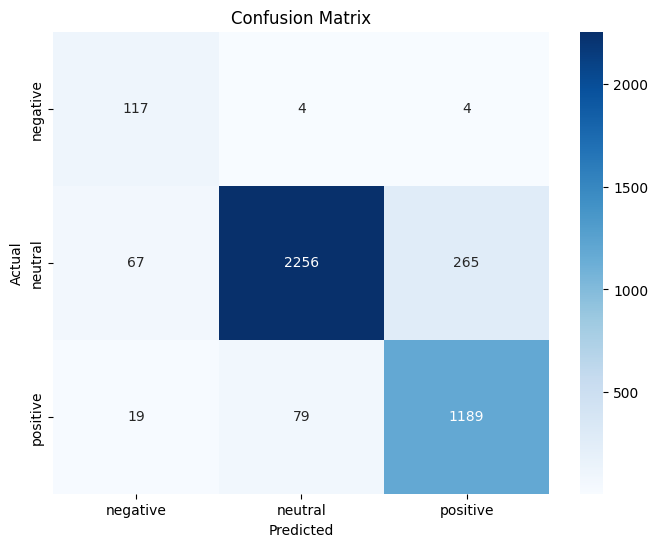

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["negative", "neutral", "positive"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["negative", "neutral", "positive"])
plt.show()
